In [66]:
!pip install pandas numpy scikit-learn matplotlib seaborn xgboost joblib lightgbm\
geopy imbalanced-learn

## Import libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import joblib
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import classification_report, accuracy_score,\
confusion_matrix, roc_auc_score, roc_curve, auc, RocCurveDisplay

from geopy.distance import geodesic
from collections import Counter

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN

## Import Data

In [70]:
df = pd.read_csv("cleaned_data.csv")

In [72]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delay,order_item_id,...,geolocation_state_customer,geolocation_zip_code_prefix_seller,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller,geolocation_state_seller,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0,1,...,SP,9350.0,-23.680114,-46.452454,maua,SP,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,0,1,...,BA,31570.0,-19.810119,-43.984727,belo horizonte,MG,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0,1,...,GO,14840.0,-21.362358,-48.232976,guariba,SP,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0,1,...,RN,31842.0,-19.840168,-43.923299,belo horizonte,MG,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0,1,...,SP,8752.0,-23.551707,-46.260979,mogi das cruzes,SP,250.0,51.0,15.0,15.0


In [74]:
df.shape

(109619, 29)

In [76]:
df.describe()

,delay,order_item_id,customer_zip_code_prefix,seller_zip_code_prefix,geolocation_zip_code_prefix_customer,geolocation_lat_customer,geolocation_lng_customer,geolocation_zip_code_prefix_seller,geolocation_lat_seller,geolocation_lng_seller,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,109619.000000,109619.000000,109619.000000,109619.000000,109619.000000,109619.000000,109619.000000,109619.000000,109619.000000,109619.000000,109619.000000,109619.000000,109619.000000,109619.000000
mean,0.079010,1.198506,35075.926245,24478.563625,35075.926245,-21.246685,-46.216125,24478.563625,-22.801449,-47.240495,2087.938715,30.134457,16.575265,22.975579
std,0.269756,0.707761,29887.814951,27634.610555,29887.814951,5.570509,4.043632,27634.610555,2.703291,2.342634,3736.427270,16.114594,13.419464,11.661143
min,0.000000,1.000000,1003.000000,1001.000000,1003.000000,-36.605374,-72.666706,1001.000000,-36.605374,-64.283946,0.000000,7.000000,2.000000,6.000000
25%,0.000000,1.000000,11090.000000,6429.000000,11090.000000,-23.591202,-48.125580,6429.000000,-23.611243,-48.831547,300.000000,18.000000,8.000000,15.000000
50%,0.000000,1.000000,24241.000000,13575.000000,24241.000000,-22.931016,-46.634516,13575.000000,-23.422313,-46.755211,700.000000,25.000000,13.000000,20.000000
75%,0.000000,1.000000,58755.000000,27930.000000,58755.000000,-20.198222,-43.673679,27930.000000,-21.766477,-46.518082,1800.000000,38.000000,20.000000,30.000000
max,1.000000,21.000000,99980.000000,99730.000000,99980.000000,42.184003,-8.577855,99730.000000,-2.546079,-34.847856,40425.000000,105.000000,105.000000,118.000000


## Feature Extraction

In [78]:
# Display column names
print("Existing columns in the Dataset")
df.columns

Existing columns in the Dataset


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delay', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'customer_zip_code_prefix',
       'seller_zip_code_prefix', 'geolocation_zip_code_prefix_customer',
       'geolocation_lat_customer', 'geolocation_lng_customer',
       'geolocation_city_customer', 'geolocation_state_customer',
       'geolocation_zip_code_prefix_seller', 'geolocation_lat_seller',
       'geolocation_lng_seller', 'geolocation_city_seller',
       'geolocation_state_seller', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'],
      dtype='object')

In [80]:
# Data types of existing columns
df.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp                 object
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
delay                                     int64
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date                      object
customer_zip_code_prefix                  int64
seller_zip_code_prefix                    int64
geolocation_zip_code_prefix_customer    float64
geolocation_lat_customer                float64
geolocation_lng_customer                float64
geolocation_city_customer                object
geolocation_state_customer               object
geolocation_zip_code_prefix_seller      

In [82]:
# Convert order_purchase_timestamp to datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], errors='coerce')


In [84]:
# Extract order_month and order_day_of_week
df['order_month'] = df['order_purchase_timestamp'].dt.month
df['order_day_of_week'] = df['order_purchase_timestamp'].dt.dayofweek


In [86]:
# Compute distance_km using latitude & longitude
def calculate_distance(row):
    try:
        customer_loc = (row['geolocation_lat_customer'], row['geolocation_lng_customer'])
        seller_loc = (row['geolocation_lat_seller'], row['geolocation_lng_seller'])
        return geodesic(customer_loc, seller_loc).km
    except:
        return None


In [88]:
df['distance_km'] = df.apply(calculate_distance, axis=1)
df['distance_km']

0           18.051106
1          852.256379
2          511.820721
3         1816.652139
4           30.189028
             ...     
109614     474.239469
109615     967.147828
109616     370.231030
109617     370.231030
109618     629.767991
Name: distance_km, Length: 109619, dtype: float64

In [90]:
# Create same_state (1 if customer and seller are in the same state, else 0)
df['same_state'] = (df['geolocation_state_customer'] == df['geolocation_state_seller']).astype(int)


In [92]:
# Select required columns and save to a new dataset
selected_features = ["distance_km", "same_state", "order_day_of_week", "order_month", "delay"]
df[selected_features].to_csv("extracted_features_dataset.csv", index=False)
print("✅ Extracted features saved as 'extracted_features_dataset.csv'")

✅ Extracted features saved as 'extracted_features_dataset.csv'


## Load the new dataset

In [95]:
new_df = pd.read_csv('extracted_features_dataset.csv')
new_df

,distance_km,same_state,order_day_of_week,order_month,delay
0,18.051106,1,0,10,0
1,852.256379,0,1,7,0
2,511.820721,0,2,8,0
3,1816.652139,0,5,11,0
4,30.189028,1,1,2,0
...,...,...,...,...,...
109614,474.239469,1,1,2,0
109615,967.147828,0,6,8,0
109616,370.231030,0,0,1,0
109617,370.231030,0,0,1,0


In [97]:
new_df.columns

Index(['distance_km', 'same_state', 'order_day_of_week', 'order_month',
       'delay'],
      dtype='object')

In [99]:
# Handle missing values
# Drop rows with NaN values in essential features (if needed)
new_df = new_df.dropna()

# OR: Fill NaN values with median (recommended for numerical data)
new_df.fillna(new_df.median(), inplace=True)

# Verify if NaNs are handled
print("Missing values after cleaning:\n", new_df.isna().sum())

Missing values after cleaning:
 distance_km          0
same_state           0
order_day_of_week    0
order_month          0
delay                0
dtype: int64


In [101]:
# Check class imbalance
print(new_df['delay'].value_counts())

delay
0    100958
1      8661
Name: count, dtype: int64


## Train, Validation,Test Split

In [103]:
# Step 4: Select features & target
features = ["distance_km", "same_state", "order_day_of_week", "order_month"]
X = new_df[features]
y = new_df["delay"]

In [105]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (109619, 4)
y shape: (109619,)


In [107]:
# Step 5: Split into Train, Validation, and Test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [109]:
# Records in Training Set
print(X_train.shape)
print(y_train.shape)

(76733, 4)
(76733,)


In [111]:
# Records in Validation Set
print(X_val.shape)
print(y_val.shape)

(16443, 4)
(16443,)


In [113]:
# Records in Test Set
print(X_test.shape)
print(y_test.shape)

(16443, 4)
(16443,)


### ✅ Check Class Imbalance in Training

In [115]:
print("Class distribution in y_train:")
print(Counter(y_train))

# Or using pandas
print("\nPercentage distribution:")
print(y_train.value_counts(normalize=True) * 100)

Class distribution in y_train:
Counter({0: 70670, 1: 6063})

Percentage distribution:
delay
0    92.098576
1     7.901424
Name: proportion, dtype: float64


### Normalize the features

In [117]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # Fit only on training
X_val_scaled = scaler.transform(X_val)           # Transform val
X_test_scaled = scaler.transform(X_test)         # Transform test

## Resampling (on Train Set)

**Resampling Techniques for Imbalanced Classification**
1. Random Undersampling
2. Random Oversampling
3. SMOTE (Synthetic Minority Over-sampling Technique)
4. SMOTE + Tomket Links (Hybrid)
5. ADASYN

Note: Use only one out of all the resampling methods.

In [119]:
# Check original distribution
print("Before Resampling:", Counter(y_train))

Before Resampling: Counter({0: 70670, 1: 6063})


**1. Random Undersampling**

In [60]:
# rus = RandomUnderSampler(random_state=42)
# X_rus, y_rus = rus.fit_resample(X_train_scaled, y_train)
# print("After RandomUnderSampler:", Counter(y_rus))


**2. Random Oversampling**

In [121]:
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train_scaled, y_train)
print("After RandomOverSampler:", Counter(y_ros))


After RandomOverSampler: Counter({0: 70670, 1: 70670})


**3. SMOTE (Synthetic Minority Over-sampling Technique)**

In [ ]:
# smote = SMOTE(random_state=42)
# X_smote, y_smote = smote.fit_resample(X_train_scaled, y_train)
# print("After SMOTE:", Counter(y_smote))


**4.  SMOTE + TomekLinks (Hybrid: Over + Under Sampling)**

In [ ]:
# smt = SMOTETomek(random_state=42)
# X_smt, y_smt = smt.fit_resample(X_train_scaled, y_train)
# print("After SMOTE + TomekLinks:", Counter(y_smt))


**5. ADASYN (Adaptive Synthetic Sampling)**

In [ ]:
# adasyn = ADASYN(random_state=42)
# X_adasyn, y_adasyn = adasyn.fit_resample(X_train_scaled, y_train)
# print("After ADASYN:", Counter(y_adasyn))

***Conclusion: Random Oversampling gives the best results out of all***

## Model Training and Evaluation

In [123]:
warnings.filterwarnings("ignore")

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting (sklearn)": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
}

# bagging

In [125]:
# Initialize results
val_accuracies = {}
val_reports = {}
val_conf_matrices = {}

# Loop through models
for name, model in models.items():
    model.fit(X_ros, y_ros)  # Train on resampled data
    y_val_pred = model.predict(X_val_scaled)       # Predict on scaled test set

    # Accuracy
    val_accuracies[name] = accuracy_score(y_val, y_val_pred)

    # Classification report
    val_reports[name] = classification_report(y_val, y_val_pred, output_dict=True)

    # Confusion matrix
    val_conf_matrices[name] = confusion_matrix(y_val, y_val_pred)

# ------------------------------
# 📊 Accuracy Table
val_accuracy_df = pd.DataFrame.from_dict(val_accuracies, orient='index', columns=['Accuracy'])
print("\n✅ Final validation Accuracies:")
print(val_accuracy_df.sort_values(by='Accuracy', ascending=False).round(4))

# ------------------------------
# 📊 Weighted Average Metrics Table
val_summary_rows = []
for name, metrics in val_reports.items():
    row = {
        "Model": name,
        "Precision": metrics["weighted avg"]["precision"],
        "Recall": metrics["weighted avg"]["recall"],
        "F1-Score": metrics["weighted avg"]["f1-score"],
        "Support": metrics["weighted avg"]["support"]
    }
    val_summary_rows.append(row)

val_report_df = pd.DataFrame(val_summary_rows).set_index("Model")
print("\n📌 Validation Classification Report (Weighted Avg):")
print(val_report_df.round(4))

# ------------------------------
# 🧩 Confusion Matrices
for name, matrix in val_conf_matrices.items():
    print(f"\n🧩 Confusion Matrix - {name}")
    print(matrix)

[LightGBM] [Info] Number of positive: 70670, number of negative: 70670
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 279
[LightGBM] [Info] Number of data points in the train set: 141340, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

✅ Final validation Accuracies:
                             Accuracy
Decision Tree                  0.8824
Random Forest                  0.8812
XGBoost                        0.7047
LightGBM                       0.6937
Gradient Boosting (sklearn)    0.6788
Logistic Regression            0.5453

📌 Validation Classification Report (Weighted Avg):
                             Precision  Recall  F1-Score  Support
Model                                                            
Logistic Regress

no weighted average , macro average

**1️⃣ Accuracy Bar Chart**

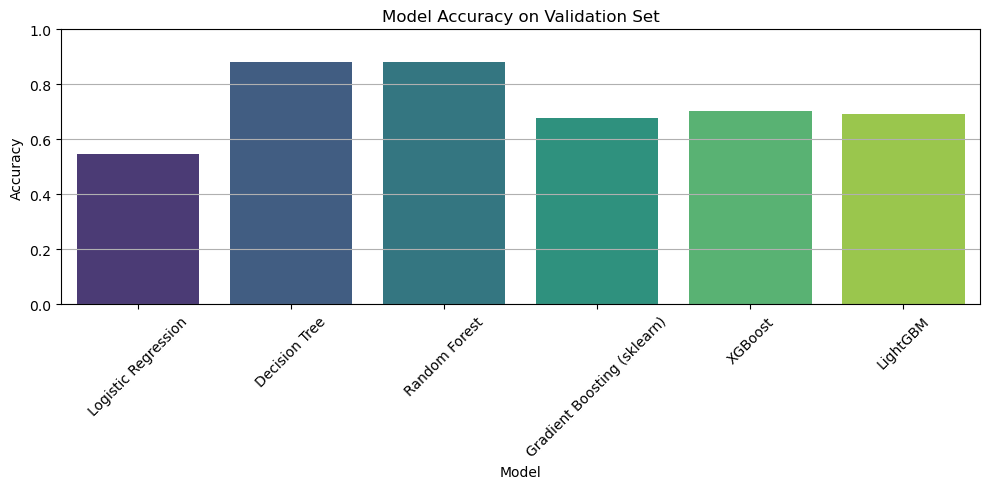

In [127]:
# Accuracy Bar Chart
plt.figure(figsize=(10, 5))
sns.barplot(x=val_accuracy_df.index, y=val_accuracy_df['Accuracy'], palette='viridis')
plt.title("Model Accuracy on Validation Set")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**2️⃣ Precision / Recall / F1-Score Charts (Weighted Average)**

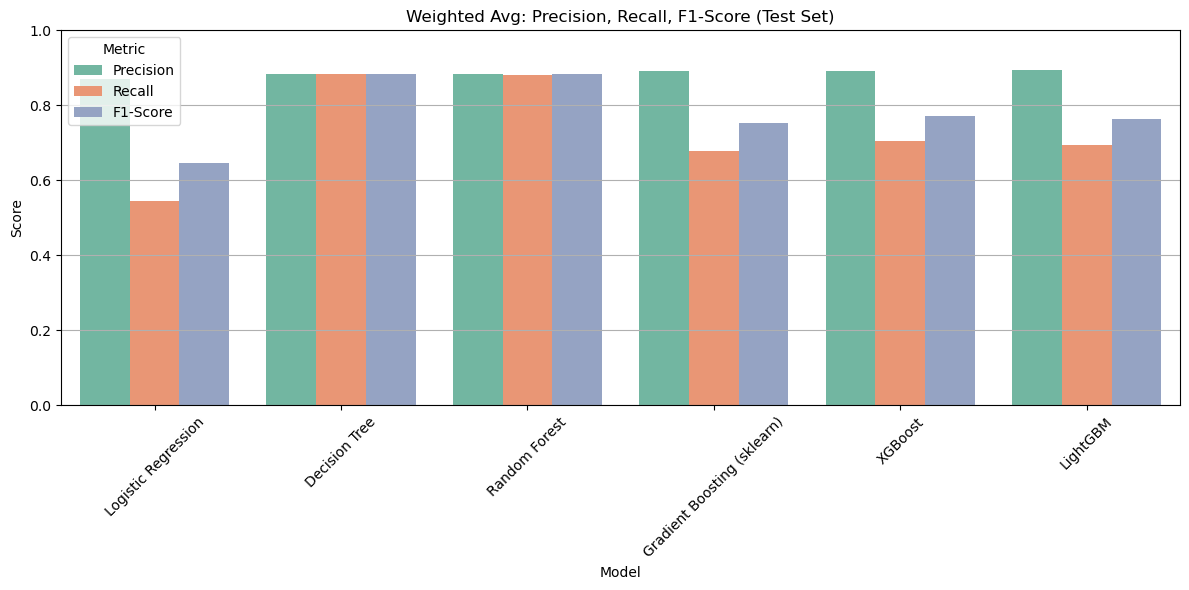

In [129]:
# Convert report_df into long format for easier plotting
report_melted = val_report_df.reset_index().melt(id_vars="Model", value_vars=["Precision", "Recall", "F1-Score"])

plt.figure(figsize=(12, 6))
sns.barplot(data=report_melted, x="Model", y="value", hue="variable", palette="Set2")
plt.title("Weighted Avg: Precision, Recall, F1-Score (Test Set)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(title="Metric")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**3️⃣ Confusion Matrix Heatmaps**

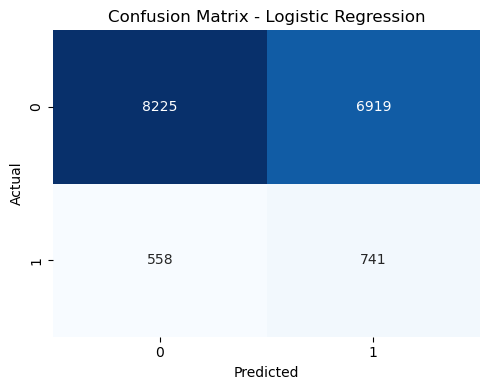

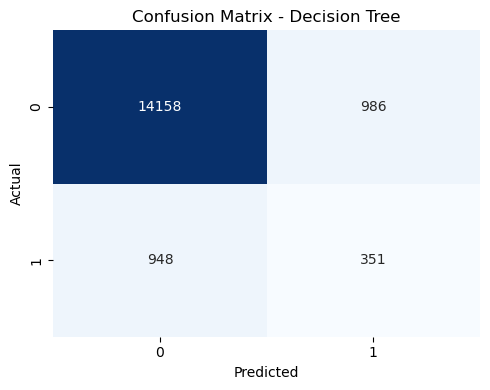

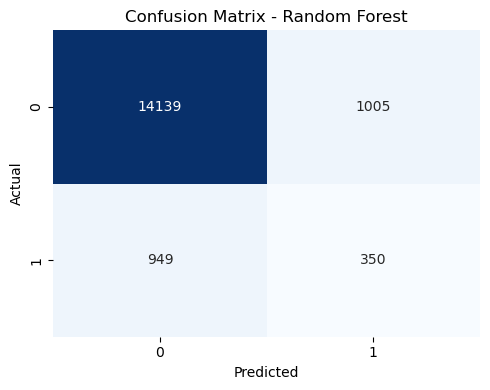

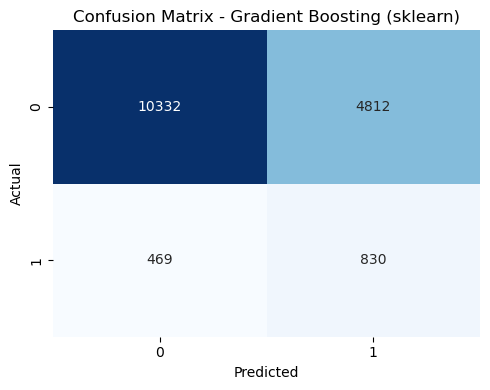

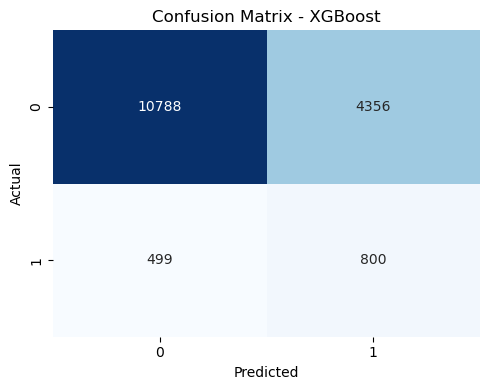

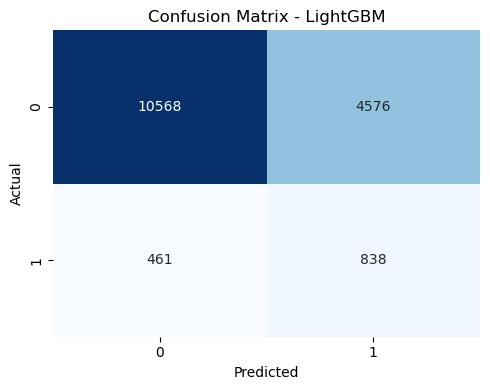

In [131]:
# Plot heatmaps
for name, matrix in val_conf_matrices.items():
    plt.figure(figsize=(5, 4))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


**4️⃣ ROC Curves**

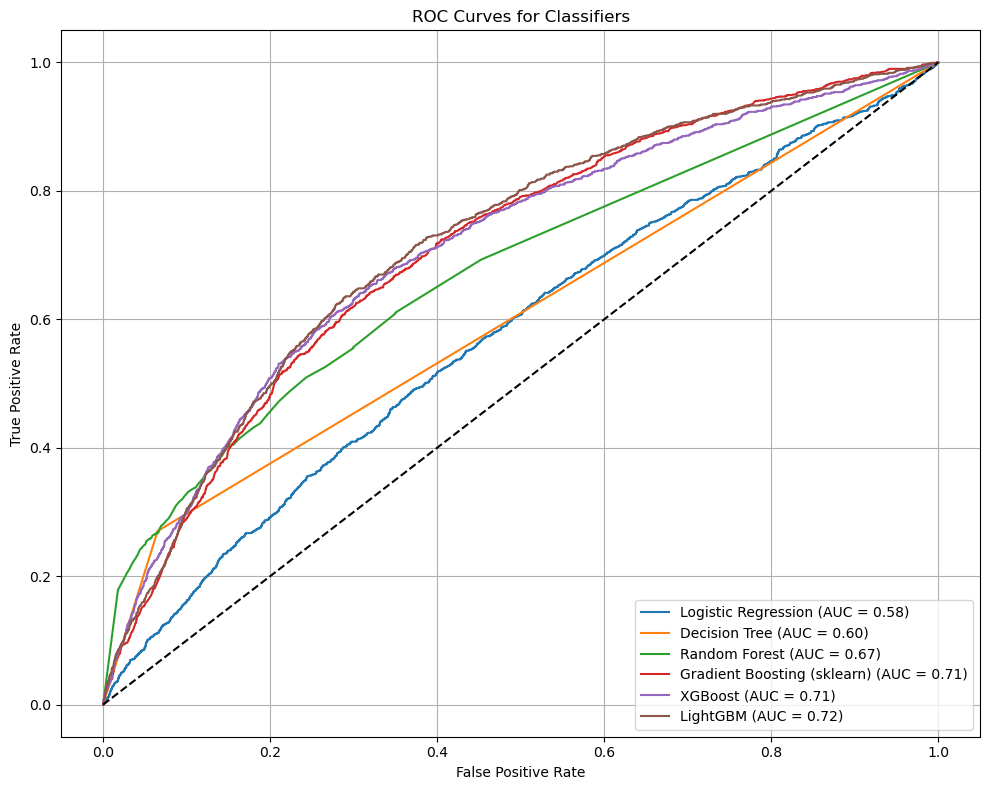

In [133]:
plt.figure(figsize=(10, 8))

for name, model in models.items():
    # Check if model supports predict_proba or decision_function
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_val_scaled)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_val_scaled)
    else:
        continue  # Skip model if no probability-like output

    fpr, tpr, _ = roc_curve(y_val, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# ROC Curve plot details
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curves for Classifiers")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

### Hyperparameter Tuning for XGBoost

In [141]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

# Define parameter grid
param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [3, 5, 7],
    'clf__learning_rate': [0.01, 0.1, 0.2],
    'clf__subsample': [0.8, 1],
    'clf__colsample_bytree': [0.8, 1],
}

# Initialize base XGBoost model
xgb_base = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define pipeline with RandomOverSampler and XGBClassifier
pipeline = Pipeline(steps=[
    ('sampler', RandomOverSampler(random_state=42)),  # Step for oversampling
    ('clf', xgb_base)  # Classifier step
])

# Perform Grid Search with 5-fold cross-validation
grid_search_xgb = GridSearchCV(
    estimator=pipeline,  # Use pipeline with oversampling and classifier
    param_grid=param_grid,  # Hyperparameter grid for the classifier
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Evaluation metric
    n_jobs=-1,  # Use all processors
    verbose=1  # Display progress
)

# Fit the grid search on the resampled training data
grid_search_xgb.fit(X_train_scaled, y_train)  # Use original training data (scaled)

# Best estimator and parameters
best_xgb = grid_search_xgb.best_estimator_
print("\n✅ Best Parameters for XGBoost:")
print(grid_search_xgb.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits

✅ Best Parameters for XGBoost:
{'clf__colsample_bytree': 1, 'clf__learning_rate': 0.2, 'clf__max_depth': 7, 'clf__n_estimators': 200, 'clf__subsample': 0.8}


In [143]:
from lightgbm import LGBMClassifier

param_grid_lgb = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [3, 5, 7],
    'clf__learning_rate': [0.01, 0.1, 0.2],
    'clf__subsample': [0.8, 1],
    'clf__colsample_bytree': [0.8, 1],
}

pipeline_lgb = Pipeline(steps=[
    ('sampler', RandomOverSampler(random_state=42)),
    ('clf', LGBMClassifier(random_state=42))
])

grid_search_lgb = GridSearchCV(
    estimator=pipeline_lgb,
    param_grid=param_grid_lgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_lgb.fit(X_train_scaled, y_train)
best_lgb = grid_search_lgb.best_estimator_
print("\n✅ Best Parameters for LightGBM:")
print(grid_search_lgb.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[LightGBM] [Info] Number of positive: 70670, number of negative: 70670
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 279
[LightGBM] [Info] Number of data points in the train set: 141340, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [145]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid_gb = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [3, 5, 7],
    'clf__learning_rate': [0.01, 0.1, 0.2],
    'clf__subsample': [0.8, 1],
}

pipeline_gb = Pipeline(steps=[
    ('sampler', RandomOverSampler(random_state=42)),
    ('clf', GradientBoostingClassifier(random_state=42))
])

grid_search_gb = GridSearchCV(
    estimator=pipeline_gb,
    param_grid=param_grid_gb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_gb.fit(X_train_scaled, y_train)
best_gb = grid_search_gb.best_estimator_
print("\n✅ Best Parameters for Gradient Boosting:")
print(grid_search_gb.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits

✅ Best Parameters for Gradient Boosting:
{'clf__learning_rate': 0.2, 'clf__max_depth': 7, 'clf__n_estimators': 200, 'clf__subsample': 0.8}


In [147]:
# Dictionary to store tuned models
tuned_models = {
    "XGBoost": best_xgb,
    "LightGBM": best_lgb,
    "Gradient Boosting": best_gb
}

# Initialize storage
val_results = {}
val_reports = []

# Evaluate each tuned model on validation set
for name, model in tuned_models.items():
    y_val_pred = model.predict(X_val_scaled)

    # Accuracy
    val_results[name] = accuracy_score(y_val, y_val_pred)

    # Classification report (weighted avg)
    report = classification_report(y_val, y_val_pred, output_dict=True)
    val_reports.append({
        "Model": name,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-Score": report["weighted avg"]["f1-score"],
        "Support": report["weighted avg"]["support"]
    })

# Create DataFrames
val_accuracy_df = pd.DataFrame.from_dict(val_results, orient="index", columns=["Accuracy"])
val_report_df = pd.DataFrame(val_reports).set_index("Model")

print("\n📊 Validation Accuracy:")
print(val_accuracy_df.round(4))

print("\n📌 Validation Classification Report (Weighted Avg):")
print(val_report_df.round(4))


📊 Validation Accuracy:
                   Accuracy
XGBoost              0.7272
LightGBM             0.7372
Gradient Boosting    0.7724

📌 Validation Classification Report (Weighted Avg):
                   Precision  Recall  F1-Score  Support
Model                                                  
XGBoost               0.8884  0.7272    0.7870  16443.0
LightGBM              0.8853  0.7372    0.7935  16443.0
Gradient Boosting     0.8897  0.7724    0.8180  16443.0


### ✅ Evaluate on Test Set

In [149]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on validation or test set
y_pred = best_gb.predict(X_test_scaled)

print("\n🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))
print("\n🧩 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



🎯 Accuracy: 0.7767439031806848

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.80      0.87     15144
           1       0.18      0.52      0.27      1299

    accuracy                           0.78     16443
   macro avg       0.57      0.66      0.57     16443
weighted avg       0.89      0.78      0.82     16443


🧩 Confusion Matrix:
[[12103  3041]
 [  630   669]]
